# Sms Spam Classification

## Problem Statement

Text messaging has revolutionized communication in the modern world. However, it comes with its own issues. Most of us deal with so many unwanted promotional messages which are of very little importance. If mobile companies could have an inbuilt feature which would be able to identify such spam messages and take necessary actions to block then there would be a significant satisfaction among the consumers. 
Here, we have a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.


We will try to build a classifier using Naive Bayes algorithm which will be able to classify text messages as spam or ham.

## Attribute Information

Dataset has 2 columns and 5572 rows

v1 - class (label)

v2 - sms ( text)


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data and Exploratory Data Analysis

4. Data Preprocessing

  4.1.1 - Convert all strings to lower case form

  4.1.2 - Removal of stop words

  4.1.3 - Removal of rarely used words

  4.1.3 - Tokenization/ Stemming

  4.1.4 - TF-IDF Computation

  4.1.5 - Bag of words Implementation

5. Naive Bayes

6. Conclusion and Interpretation

In [2]:
#Import drive from google colab
from google.colab import drive

In [3]:
#Mount drive to access dataset and notebook from google drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 1. Import Libraries

In [ ]:
# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os
import warnings

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns

# NLTK is used for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

## 2. Setting Options

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data and EDA

In [ ]:
# Read dataset using pandas
df=pd.read_csv('gdrive/My Drive/AIML_RS_CSV/Samsung/spam.csv', encoding='latin-1')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Rename columns names 
df = df.rename(columns={"v1":"label", "v2":"sms"})
df.head(2)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [ ]:
#Checking the shape of the dataset
df.shape

(5572, 2)

In [ ]:
#Checking info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


ham     4825
spam     747
Name: label, dtype: int64


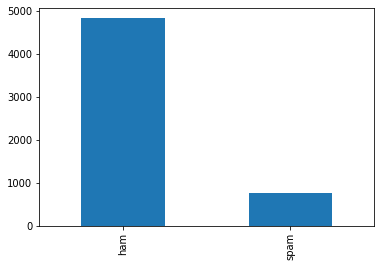

In [ ]:
#Number of observations in each label spam and ham
count = df.label.value_counts()
print(count)
df.label.value_counts().plot(kind = 'bar')

We see that class is not balanced. Number of spam messages is less than number of normal messages

In [ ]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


We can see that there are 5168 unique values for sms that means some messages are same ( duplicate)

In [ ]:
#Checking duplicate rows
dff = df[df.duplicated()]

In [ ]:
dff.head(2)

,label,sms
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...


In [ ]:
#Checking value counts of dataframe having duplicate rows
dff.label.value_counts()

ham     309
spam     94
Name: label, dtype: int64

In [ ]:
#Removing duplicate rows
df = df.drop_duplicates()
df.shape

(5169, 2)

In [ ]:
#Checking length of the sms
df['length'] = df['sms'].apply(len)
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


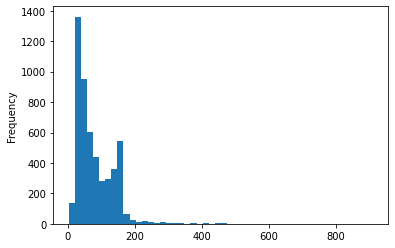

In [ ]:
#Checking distribution of length

%matplotlib inline
df['length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fddf5f13d68>,
      dtype=object)

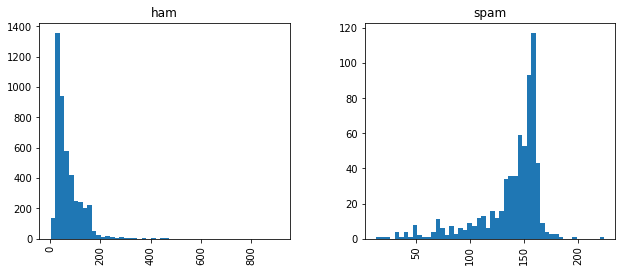

In [ ]:
#Checking distribution of length for both the classes
df.hist(column='length', by='label', bins=50,figsize=(10,4))

## 4. Text Preproessing

In [ ]:
#Encode labels
df.loc[:,'label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head()

(5169, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#Checking top 10 values of sms
df['sms'].head(10)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: sms, dtype: object

In [ ]:
#Computing word count for each sms
#lambda function is used to comput the count. It take a string as an input and splits it basis " " and checks the length of the string
df['word_count'] = df['sms'].apply(lambda x: len(str(x).split(" ")))
df[['sms','length','word_count']].head()

,sms,length,word_count
0,"Go until jurong point, crazy.. Available only ...",111,20
1,Ok lar... Joking wif u oni...,29,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,U dun say so early hor... U c already then say...,49,11
4,"Nah I don't think he goes to usf, he lives aro...",61,13


In [ ]:
# Converting wrds into lower case format
df['sms'] = df['sms'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['sms'].head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: sms, dtype: object

In [ ]:
#Removing punctuations
df['sms'] = df['sms'].str.replace('[^\w\s]','')
df['sms'].head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup fina...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: sms, dtype: object

In [ ]:
#Removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words("english")
df['sms'] = df['sms'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['sms'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: sms, dtype: object

In [ ]:
#Checking frequency of words in the entire sms column and fetching top 10 frequencies
freq = pd.Series(' '.join(df['sms']).split()).value_counts()[:10]
freq

u       1001
call     487
im       447
2        443
get      364
ur       316
go       269
dont     258
4        257
ltgt     254
dtype: int64

In [ ]:
#REmoving the above top 10 words
freq = list(freq.index)
df['sms'] = df['sms'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['sms'].head()

0    jurong point crazy available bugis n great wor...
1                                ok lar joking wif oni
2    free entry wkly comp win fa cup final tkts 21s...
3                      dun say early hor c already say
4               nah think goes usf lives around though
Name: sms, dtype: object

In [ ]:
##Checking frequency of words in the entire sms column and fetching the last 10 frequencies
freq = pd.Series(' '.join(df['sms']).split()).value_counts()[-10:]
freq

dusk             1
poorly           1
cin              1
rumbling         1
trav             1
545              1
witin            1
dhina            1
animation        1
unconsciously    1
dtype: int64

In [ ]:
#Removing the rarely used words
freq = list(freq.index)
df['sms'] = df['sms'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['sms'].head()

0    jurong point crazy available bugis n great wor...
1                                ok lar joking wif oni
2    free entry wkly comp win fa cup final tkts 21s...
3                      dun say early hor c already say
4               nah think goes usf lives around though
Name: sms, dtype: object

In [ ]:
#Creating stems of the words using stemming
st = PorterStemmer()
df['sms'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    jurong point crazi avail bugi n great world la...
1                                  ok lar joke wif oni
2    free entri wkli comp win fa cup final tkt 21st...
3                      dun say earli hor c alreadi say
4                 nah think goe usf live around though
Name: sms, dtype: object

## 5. Naive Bayes

In [ ]:
#Splitting the dataframe into train and test set
X_train, X_test, y_train, y_test = train_test_split(df['sms'], df['label'],test_size=0.20)

Bag of Words

What we have here in our data set is a large collection of text data. Most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy. We need a way to represent text data for machine learning algorithm and the bag-of-words model helps us to achieve that task. It is a way of extracting features from the text for use in machine learning algorithms. In this approach, we use the tokenized words for each observation and find out the frequency of each token. Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

We will be using the multinomial Naive Bayes implementation. This is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. On the other hand Gaussian Naive Bayes is better suited for continuous data as it assumes that the input data has a Gaussian(normal) distribution.

In [ ]:
#Initialize Naive Bayes algorithm and fit the train data
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Predict on testing data
predictions = naive_bayes.predict(testing_data)

In [ ]:
#Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9777562862669246
Precision score: 0.9304347826086956
Recall score: 0.8770491803278688
F1 score: 0.9029535864978903


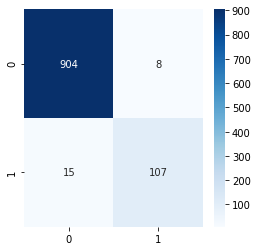

In [ ]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, predictions)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (4,4))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

## 6. Conclusion and Interpretation

1. Naive Bayes model is able to classify a message with an accuracy of 97.7%

2. Here, FN are really important for us because we do not want to classify any legitimate message as spam.

3. We can try balancing our classes to improve prediction for 'ham' messages.

4. One of the major advantages that Naive Bayes has over other classification algorithms is its ability to handle an extremely large number of features. In our case, each word is treated as a feature and there are thousands of different words. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them.

5. Naive Bayes is robust to outliers. It rarely ever overfits the data.
